In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('turkiye-student-evaluation_generic.csv')

In [3]:
dataset_questions = dataset.iloc[:,5:33]

In [4]:
def repeat(x):
    if x > 1:
        return 0
    else:
        return 1

dataset_questions['eligibility'] = dataset['nb.repeat'].apply(lambda x: repeat(x))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [5]:
dataset_questions.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,eligibility
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,...,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076,0.843471
std,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,...,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709,0.363388
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


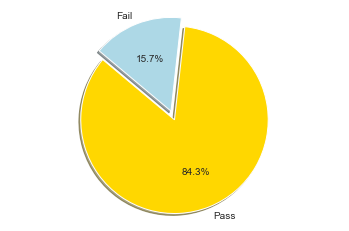

1    4909
0     911
Name: eligibility, dtype: int64


In [6]:
result = dataset_questions.eligibility.value_counts()


# Annotations to the pie-chart slices
labels = 'Pass', 'Fail',

colors = ['gold', 'lightblue',]
explode = (0.1, 0)  # explode 1st slice

# Plot the data
plt.pie(result, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
print(result)

In [7]:
from sklearn.model_selection import train_test_split

X =  dataset.drop(['nb.repeat'], axis=1)
y = dataset_questions['eligibility']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test , y_pred)
cm

array([[  37,  237],
       [  37, 1435]], dtype=int64)

In [10]:
total=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total

In [11]:
print("accuracy:", accuracy)

accuracy: 0.843069873997709


In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth= 6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test , y_pred)
cm

array([[  38,  236],
       [  37, 1435]], dtype=int64)

In [19]:
total=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total

In [20]:
print("accuracy:", accuracy)

accuracy: 0.8436426116838488


In [12]:
from IPython.display import Image  
#from sklearn.externals.six import StringIO 
import io
from sklearn.tree import export_graphviz
import pydotplus,graphviz

features = list(X.columns[0:])
features

['instr',
 'class',
 'attendance',
 'difficulty',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28']

In [13]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [16]:
dot_data = io.StringIO()  
export_graphviz(classifier, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("result_en.pdf")

True

In [17]:
os.getcwd()

'D:\\ml project'